In [1]:
from mde.data.mono_dataset import KITTIRAWDataset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import lightning as L
from torch import optim, nn, utils, Tensor
from training_module import MDE

mde = MDE()
dataset = KITTIRAWDataset('/app/data/data_depth_annotated/2011_09_26',
                                            375,1242,
                                           [0], 1, is_train=True)
train_loader = utils.data.DataLoader(dataset)

trainer = L.Trainer(limit_train_batches=100, max_epochs=1)
trainer.fit(model=mde, train_dataloaders=train_loader)





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to

Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] 

/app/training_module.py:20: UserWarning: Using a target size (torch.Size([1, 1, 100, 331])) that is different to the input size (torch.Size([1, 1, 376, 1244])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = nn.functional.mse_loss(z, y)


RuntimeError: The size of tensor a (1244) must match the size of tensor b (331) at non-singleton dimension 3

In [1]:
from mde.network.depth_decoder import MDEModel
from torchsummary import summary
summary(MDEModel(), (3, 100, 331))
# print(MDEModel())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 64, 50, 166]           9,408
       BatchNorm2d-2          [-1, 64, 50, 166]             128
              ReLU-3          [-1, 64, 50, 166]               0
         MaxPool2d-4           [-1, 64, 25, 83]               0
            Conv2d-5           [-1, 64, 25, 83]          36,864
       BatchNorm2d-6           [-1, 64, 25, 83]             128
              ReLU-7           [-1, 64, 25, 83]               0
            Conv2d-8           [-1, 64, 25, 83]          36,864
       BatchNorm2d-9           [-1, 64, 25, 83]             128
             ReLU-10           [-1, 64, 25, 83]               0
       BasicBlock-11           [-1, 64, 25, 83]               0
           Conv2d-12           [-1, 64, 25, 83]          36,864
      BatchNorm2d-13           [-1, 64, 25, 83]             128
             ReLU-14           [-1, 64,

In [58]:
import cv2
cv2.merge(tuple([i.tolist() for i in e[('color',0,0)]]))

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'merge'
> Overload resolution failed:
>  - Can't parse 'mv'. Sequence item with index 0 has a wrong type
>  - Can't parse 'mv'. Sequence item with index 0 has a wrong type


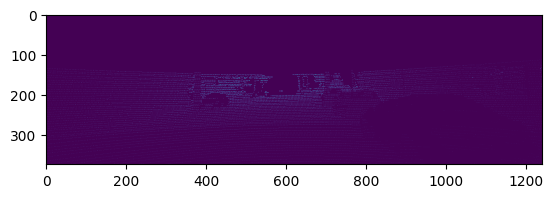

In [5]:
plt.imshow(e['depth_gt'].squeeze(0))

In [25]:
from glob import glob
import math
import random
paths = glob('/app/data/data_depth_annotated/2011_09_26/*/')
tracks = set([int(i.split('/')[-2].split('_')[-2]) for i in paths])
trackf=tracks
dataset_len=len(tracks)
train = random.choices(list(tracks), k=math.ceil((dataset_len/10)*8))
tracks = tracks-set(train)
test = random.choices(list(tracks), k=dataset_len//10)
val = tracks-set(test)


In [22]:
dataset_len/10*7

10.5

In [35]:
!pip3 install torchinfo

In [36]:
import torch
from torchinfo import summary

In [41]:
from torchvision import models
import torch.nn as nn
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


In [42]:
layers = (list(model.children())[:-1])
layers.append(nn.Flatten())
vec_model = nn.Sequential(*layers)
summary(vec_model, input_size=(16, 3, 224, 224), row_settings=("depth", "ascii_only"))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [16, 2048]                --
+ Conv2d: 1-1                            [16, 64, 112, 112]        9,408
+ BatchNorm2d: 1-2                       [16, 64, 112, 112]        128
+ ReLU: 1-3                              [16, 64, 112, 112]        --
+ MaxPool2d: 1-4                         [16, 64, 56, 56]          --
+ Sequential: 1-5                        [16, 256, 56, 56]         --
|    + Bottleneck: 2-1                   [16, 256, 56, 56]         --
|    |    + Conv2d: 3-1                  [16, 64, 56, 56]          4,096
|    |    + BatchNorm2d: 3-2             [16, 64, 56, 56]          128
|    |    + ReLU: 3-3                    [16, 64, 56, 56]          --
|    |    + Conv2d: 3-4                  [16, 64, 56, 56]          36,864
|    |    + BatchNorm2d: 3-5             [16, 64, 56, 56]          128
|    |    + ReLU: 3-6                    [16, 64, 56, 56]          --
| 